In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

In [2]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
# By Pramod Sharma : pramod.sharma@prasami.com

###-----------------
### Import Libraries
###-----------------

import os
import datetime
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# from utils.log_event import fn_log_event


# verify if the directory exists
def fn_dir_exists(_dir):
    '''
    Args:
    	_dir: path if a directory
     '''

    res = os.path.exists(_dir)

    fn_log_event ('-- Directory "{}" exist : {}'.format(_dir, res), 'debug')

    if not res:

        fn_log_event ('-- Directory "{}" does not exists.'.format(_dir), 'debug')

        sys.exit('-- Directory "{}" does not exists.'.format(_dir))

    return res



def fn_file_exists(_file):
    '''
        verify if the file exists
    '''
    res = os.path.exists(_file)

    fn_log_event ('-- File "{}" exist : {}'.format(_file, res), 'debug')

    if not res:

        fn_log_event ('-- File "{}" does not exists.'.format(_file), 'debug')

        sys.exit('-- File "{}" does not exists.'.format(_file))

    return res


###-----------------------------
### Verify or create a directory
###-----------------------------
def fn_verify_dir(_path : str):
    '''
    Arg:
        path: path to verify the directory
    returns:
        create dir if it does not exists
    '''
    if os.path.exists(_path): # check if the path exists. Maybe a file or a folder

        print(_path, ' exists') # advised the user

    else:

        os.makedirs(_path) # create the path

        print("Created folder : ", _path)

###------------------------------------------------
### Plot Loss Curve using Tensorflow history object
###------------------------------------------------
def fn_plot_tf_hist(hist_df):

    '''
    Args:
        hist_df: a dataframe with following ccolumns
            column 0: loss
            column 1: accuracy
            column 2: val_loss
            column 3: val_accuracy
            While plotting columns are accessed by index
            so that even if the column names are different it will not throw exceptions.
    '''

    fig, axes = plt.subplots(1,2 , figsize = (15,6))

    # properties  matplotlib.patch.Patch
    props = dict(boxstyle='round', facecolor='aqua', alpha=0.4)
    facecolor = 'cyan'
    fontsize=12
    CMAP = plt.cm.coolwarm

    # Get columns by index to eliminate any column naming error
    y1 = hist_df.columns[0]
    y2 = hist_df.columns[1]
    y3 = hist_df.columns[2]
    y4 = hist_df.columns[3]

    # Where was min loss
    best = hist_df[hist_df[y3] == hist_df[y3].min()]

    ax = axes[0]

    hist_df.plot(y = [y1,y3], ax = ax, colormap=CMAP)


    # little beautification
    txtFmt = "Loss: \n  train: {:6.4f}\n   test: {:6.4f}"
    txtstr = txtFmt.format(hist_df.iloc[-1][y1],
                           hist_df.iloc[-1][y3]) #text to plot

    # place a text box in upper middle in axes coords
    ax.text(0.3, 0.95, txtstr, transform=ax.transAxes, fontsize=fontsize,
            verticalalignment='top', bbox=props)

    # calculate offset for arroe
    y_min = min(hist_df[y1].min(), hist_df[y3].min())
    y_max = max(hist_df[y1].max(), hist_df[y3].max())
    offset = (y_max-y_min)/10.0

    # Mark arrow at lowest
    ax.annotate(f'Min: {best[y3].to_numpy()[0]:6.4f}', # text to print
                xy=(best.index.to_numpy(), best[y3].to_numpy()[0]), # Arrow start
                xytext=(best.index.to_numpy(), best[y3].to_numpy()[0] + offset), # location of text
                fontsize=fontsize, va='bottom', ha='right',bbox=props, # beautification of text
                arrowprops=dict(facecolor=facecolor, shrink=0.05)) # arrow

    # Draw vertical line at best value
    ax.axvline(x = best.index.to_numpy(), color = 'green', linestyle='-.', lw = 3);

    ax.set_xlabel("Epochs")
    ax.set_ylabel(y1.capitalize())
    ax.set_title('Errors')
    ax.grid();
    ax.legend(loc = 'upper left') # model legend to upper left

    ax = axes[1]

    hist_df.plot( y = [y2, y4], ax = ax, colormap=CMAP)

    # little beautification
    txtFmt = "Accuracy: \n  train: {:6.4f}\n  test:  {:6.4f}"
    txtstr = txtFmt.format(hist_df.iloc[-1][y2],
                           hist_df.iloc[-1][y4]) #text to plot

    # place a text box in upper middle in axes coords
    ax.text(0.3, 0.2, txtstr, transform=ax.transAxes, fontsize=fontsize,
            verticalalignment='top', bbox=props)

    # calculate offset for arroe
    y_min = min(hist_df[y2].min(), hist_df[y4].min())
    y_max = max(hist_df[y2].max(), hist_df[y4].max())
    offset = (y_max-y_min)/10.0

    # Mark arrow at lowest
    ax.annotate(f'Best: {best[y4].to_numpy()[0]:6.4f}', # text to print
                xy=(best.index.to_numpy(), best[y4].to_numpy()[0]), # Arrow start
                xytext=(best.index.to_numpy(), best[y4].to_numpy()[0]-offset), # location of text
                fontsize=fontsize, va='bottom', ha='right',bbox=props, # beautification of text
                arrowprops=dict(facecolor=facecolor, shrink=0.05)) # arrow


    # Draw vertical line at best value
    ax.axvline(x = best.index.to_numpy(), color = 'green', linestyle='-.', lw = 3);

    ax.set_xlabel("Epochs")
    ax.set_ylabel(y2.capitalize())
    ax.grid()
    ax.legend(loc = 'lower left')

    plt.tight_layout()



###------------------------------
### Plot Loss Curve using pytorch
###------------------------------
def fn_plot_torch_hist(hist_df):

    # instantiate figure
    fig, axes = plt.subplots(1,2 , figsize = (15,6))

    # properties  matplotlib.patch.Patch
    props = dict(boxstyle='round', facecolor='cyan', alpha=0.5)

    # columns
    x = hist_df.columns[0]
    y1 = hist_df.columns[1]
    y2 = hist_df.columns[2]
    y3 = hist_df.columns[3]
    y4 = hist_df.columns[4]

    # Where was min loss
    best = hist_df[hist_df[y2] == hist_df[y2].min()]
    best = best.drop_duplicates(subset=y2)
    # pick first axis
    ax = axes[0]

    # Plot all losses
    hist_df.plot(x = x, y = [y1, y2], ax = ax)

    # calculate offset for arroe
    y_min = min(hist_df[y1].min(), hist_df[y2].min())
    y_max = max(hist_df[y1].max(), hist_df[y2].max())
    offset = (y_max-y_min)/10.0

    # little beautification
    txtFmt = "Loss: \n  train: {:6.4f}\n   test: {:6.4f}"
    txtstr = txtFmt.format(hist_df.iloc[-1][y1],
                           hist_df.iloc[-1][y2]) #text to plot

    # place a text box in upper middle in axes coords
    ax.text(0.3, 0.95, txtstr, transform=ax.transAxes, fontsize=14,
            verticalalignment='top', bbox=props)

    # Mark arrow at lowest
    ax.annotate(f'Min: {best[y2].to_numpy()[0]:6.4f}', # text to print
                xy=(best[x].to_numpy(), best[y2].to_numpy()[0]), # Arrow start
                xytext=(best[x].to_numpy()+ offset, best[y2].to_numpy()[0]+offset), # location of text
                fontsize=14,va='bottom', ha='right',bbox=props, # beautification of text
                arrowprops=dict(facecolor='cyan', shrink=0.05)) # arrow

    # Draw vertical line at best value
    ax.axvline(x = best[x].to_numpy(), color = 'green', linestyle='-.', lw = 3);

    ax.set_xlabel(x.title())
    ax.set_ylabel(y1.title())
    ax.set_title('Errors')
    ax.grid()
    ax.legend(loc = 'upper left') # model legend to upper left

    # pick second axis
    ax = axes[1]

    # Plot accuracies
    hist_df.plot(x = x, y = [y3, y4], ax = ax)

    # little beautification
    txtFmt = "Accuracy: \n  train: {:6.4f}\n  test:  {:6.4f}"
    txtstr = txtFmt.format(hist_df.iloc[-1][y3],
                           hist_df.iloc[-1][y4]) #text to plot

    # calculate offset for arroe
    y_min = min(hist_df[y3].min(), hist_df[y4].min())
    y_max = max(hist_df[y3].max(), hist_df[y4].max())
    offset = (y_max-y_min)/10.0

    # place a text box in lower middle in axes coords
    ax.text(0.3, 0.2, txtstr, transform=ax.transAxes, fontsize=12,
            verticalalignment='top', bbox=props)

    # Mark arrow at lowest
    ax.annotate(f'Best: {best[y4].to_numpy()[0]:6.4f}', # text to print
                xy=(best[x].to_numpy(), best[y4].to_numpy()[0]), # Arrow start
                xytext=(best[x].to_numpy()- offset, best[y4].to_numpy()[0]-offset), # location of text
                fontsize=14,va='bottom', ha='right',bbox=props, # beautification of text
                arrowprops=dict(facecolor='cyan', shrink=0.05)) # arrow


    # Draw a vertical line at best value
    ax.axvline(x = best[x].to_numpy(),
               color = 'green',
               linestyle='-.', lw = 3)

    # Labels
    ax.set_xlabel(x.title())
    ax.set_ylabel(y3.title())
    ax.set_title('Accuracies')
    ax.grid();
    ax.legend(loc = 'lower left')

    plt.tight_layout()



###---------------------------------------------------
### Plot count of classes in training and testing sets
###---------------------------------------------------
def fn_plot_labels(tr_ds, ts_ds, class_names = None):

    '''
        Args:
            tr_ds :  Training Dataset
            ts_ds : Testing dataset
        Returns : none
    '''

    # create figure and axes
    fig, axes = plt.subplots(1,2, figsize = (15,5))

    # get names of the classes
    if not class_names:
        tr_class_names = tr_ds.class_names
        ts_class_names = tr_ds.class_names

    # pick first axis
    ax = axes[0]

    # create dict of training labels
    class_counts = {}
    for imgs, lbls in tr_ds:
        for lbl in lbls.numpy():
            class_counts[lbl] = class_counts.get(lbl, 0) +1

    # bar plot
    ax.bar(tr_class_names, [class_counts.get(i, 0) for i in range(len(tr_class_names))],
           align='center',color = 'DarkBlue', alpha = 0.7)

    # add title
    ax.set_title('Training Set')

    # grids make it look good
    ax.grid()


    #pick second image
    ax = axes[1]

    # create dict of training labels
    class_counts = {}
    for imgs, lbls in ts_ds:
        for lbl in lbls.numpy():
            class_counts[lbl] = class_counts.get(lbl, 0) +1

    # bar plot
    ax.bar(ts_class_names, [class_counts.get(i, 0) for i in range(len(ts_class_names))],
           align='center',color = 'orange', alpha = 0.7)

    # add title
    ax.set_title('Test Set')


    # grids make it look good
    ax.grid()

    # fit the subplot(s) in to the figure area
    plt.tight_layout()

    # display all open figures
    plt.show()

def fn_convert_timestamp(tstr):
    '''
        Function to conver string of form "2015-11-12 1444"
    '''

    return datetime.strptime(tstr, "%Y-%m-%d_%H%M")

###----------------------
### Plot confusion matrix
###----------------------
def fn_plot_confusion_matrix(y_true, y_pred, labels):
    '''
    Args:
        y_true: Ground Truth
        y_pred : Predictions
        labels : dictonary
                  {0: 'Goal Keeper',
                  1: 'Defender',
                  2: 'Mid-Fielder',
                  3: 'Forward'}

    '''

    cm  = confusion_matrix(y_true, y_pred)

    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=labels.values())

    fig, ax = plt.subplots(figsize = (6,6))

    disp.plot(ax = ax, cmap = 'Blues', xticks_rotation = 'vertical', colorbar=False)
    # Disable the grid
    ax.grid(False)

    plt.show();


In [3]:
###-----------------
### Import Libraries
# ###-----------------
# import sys
# sys.path.insert(0, r'G:\My Drive\DNN')

import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import tensorflow as tf

# from utils.helper import fn_plot_tf_hist, fn_plot_confusion_matrix

In [4]:
###----------------------
### Some basic parameters
###----------------------


inpDir = '../input'
outDir = '../output'
modelDir = './models'
subDir = 'flower_photos'
altName = 'cnn_base'

RANDOM_STATE = 24 # for initialization ----- REMEMBER: to remove at the time of promotion to production
tf.random.set_seed(RANDOM_STATE) # setting for Tensorflow as well

TEST_SIZE = 0.2

ALPHA = 0.001
EPOCHS = 100 # number of cycles to run
PATIENCE = 20
LR_PATIENCE = 10
FACTOR_LR = 0.5
BATCH_SIZE = 32 # inline of Training Rows being 60000
IMG_HEIGHT = 227 # ??????????????
IMG_WIDTH = 227 # ??????????????

REG_LAMBDA = 0.001
PATIENCE = 20 # EarlyStopping -> If n no. of epochs give similar o/p, then it will stop the execution
LR_PATIENCE = 10
LR_FACTOR = 0.1

# Set parameters for decoration of plots
params = {'legend.fontsize' : 'large',
          'figure.figsize'  : (15,10),
          'axes.labelsize'  : 'x-large',
          'axes.titlesize'  :'x-large',
          'xtick.labelsize' :'large',
          'ytick.labelsize' :'large',
         }

CMAP = plt.cm.coolwarm

plt.rcParams.update(params) # update rcParams

plt.style.use('seaborn-v0_8-darkgrid') # plt.style.use('ggplot')

In [5]:
physical_devices = tf.config.list_physical_devices('GPU')

if len(physical_devices) > 0:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [6]:
def fn_plot_label(tr_ds, ts_ds):

    plt.figure(figsize = (15,5)) # instantiate the figure

    plt.subplot(1,2,1) # first out of 2

    train_labels = tf.concat([lbl for img, lbl in tr_ds], axis = 0).numpy() # get the labels

    unique, _, counts = tf.unique_with_counts(train_labels) # get counts

    plt.bar(range(len(unique)), counts, align='center', color = 'DarkBlue') # barplot the counts

    plt.xticks(range(len(unique)), class_names)

    plt.title('Training Set')

    plt.subplot(1,2,2)

    test_labels = tf.concat([lbl for img, lbl in ts_ds], axis = 0).numpy()

    unique, _, counts = tf.unique_with_counts(test_labels)

    plt.bar(range(len(unique)), counts, align='center', color = 'Orange')

    plt.xticks(range(len(unique)), class_names)

    plt.title('Test Set')


In [7]:
import pathlib
# dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

# data_dir = tf.keras.utils.get_file(origin=dataset_url,
#                                    fname='flower_photos',
#                                    untar=True)
# data_dir = pathlib.Path(data_dir)


data_dir = os.path.join(inpDir, subDir)
data_dir

'../input\\flower_photos'

In [8]:
os.listdir(data_dir)

['LICENSE.txt', 'roses', 'sunflowers', 'daisy', 'dandelion', 'tulips']

In [9]:
# create training data
train_ds =tf.keras.preprocessing.image_dataset_from_directory(
    data_dir, # path the the data directory
    validation_split=TEST_SIZE, # what ratio of validation data
    subset='training', # purpose
    seed=RANDOM_STATE,
    image_size=[IMG_HEIGHT, IMG_WIDTH], ## @@@ WHAT!
    batch_size=BATCH_SIZE
)
# test data
test_ds =tf.keras.preprocessing.image_dataset_from_directory(
    data_dir, # path the the data directory
    validation_split=TEST_SIZE, # what ratio of validation data
    subset='validation', # purpose
    seed=RANDOM_STATE,
    image_size=[IMG_HEIGHT, IMG_WIDTH], ## @@@ WHAT!
    batch_size=BATCH_SIZE
)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [10]:
# To be deleted

# labels = []
# for count, data in enumerate(train_ds):
#   imgs, lbls = data
#   # print (count, ':', imgs.shape, lbls.shape)
#   labels.append(lbls)

# unique, A, counts = tf.unique.

In [11]:
# is it picking class names
class_names = train_ds.class_names
class_names

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

In [12]:
class_dict = {k: v for k, v in enumerate(class_names)}
class_dict

{0: 'daisy', 1: 'dandelion', 2: 'roses', 3: 'sunflowers', 4: 'tulips'}

In [13]:
num_classes = len(class_names)

In [14]:
# plt.figure(figsize=(15,8))

# for images, labels in train_ds.take(1):
#     for i in range (BATCH_SIZE):
#         plt.subplot(int(BATCH_SIZE/8), 8, i +1)
#         plt.grid(False)
#         plt.imshow(images[i].numpy().astype('uint8'))
#         plt.title(class_names[labels[i]])
#         plt.axis('off')
#     plt.tight_layout()
# plt.show()

In [15]:
# plt.figure(figsize=(15,8))

# for images, labels in test_ds.take(1): # get me one batch

#     for i in range (BATCH_SIZE): # loop over batch

#         plt.subplot(int(BATCH_SIZE/8), 8, i +1) # access the axis

#         plt.grid(False) # no to grid

#         plt.imshow(images[i].numpy().astype('uint8')) # show image convert to numpy and int

#         plt.title(class_names[labels[i]])

#         plt.axis('off')

#     plt.tight_layout()

# plt.show()

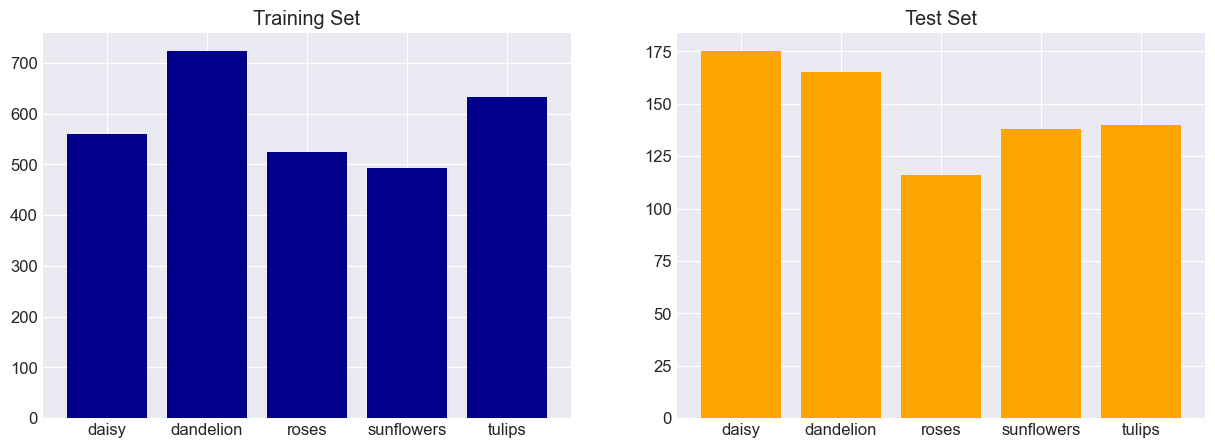

In [16]:
fn_plot_label(train_ds, test_ds)

In [17]:
input_shape = (IMG_HEIGHT, IMG_WIDTH, 3)
input_shape

(227, 227, 3)

In [18]:
def build_model(input_shape, num_classes):

  krnl_init = tf.keras.initializers.GlorotUniform(seed = RANDOM_STATE)

  model = tf.keras.Sequential()

  # Pre-Processing
  model.add(tf.keras.layers.Rescaling(1./255.))

  # Convolution Layer - 1
  model.add(tf.keras.layers.Conv2D(96, 11, # filter_size, kernel_size
                                   strides=4,
                                  kernel_initializer = krnl_init,
                                  activation='relu',
                                  input_shape=input_shape))    # Output size expecting of next layer= 55*55*96 (Input to Conv. Layer - 1)

  # MaxPooling - 1
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(3,3), strides=2)) # Output size expecting of next layer= 27*27*96 (Conv. Layer - 1 to MaxPool Layer - 1)

  # Convolution Layer - 2
  model.add(tf.keras.layers.Conv2D(256, (5, 5),
                                   strides=1,
                                   padding='same',
                                   kernel_initializer = krnl_init,
                                   activation='relu')) # Output size expecting of next Layer = 27*27*256 (MaxPool Layer - 1 to Conv. Layer - 2)

  # MaxPooling - 2
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(3,3), strides=2)) # Output size expecting of next layer=13*13*256 (Conv. Layer - 2 to MaxPool Layer - 2)

  # Convolution Layer - 3
  model.add(tf.keras.layers.Conv2D(384, (3, 3),
                                   strides=1,
                                   padding='same',
                                   kernel_initializer = krnl_init,
                                   activation='relu')) # Output size expecting of next Layer = 13*13*384 (MaxPool Layer - 2 to Conv. Layer - 3)

  # Convolution Layer - 4
  model.add(tf.keras.layers.Conv2D(384, (3, 3),
                                   strides=1,
                                   padding='same',
                                   kernel_initializer = krnl_init,
                                   activation='relu')) # Output size expecting of next Layer = 20*20*256 (MaxPool Layer - 3 to Conv. Layer - 4)

  # Convolution Layer - 5
  model.add(tf.keras.layers.Conv2D(256, (3, 3),
                                   strides=1,
                                   padding='same',
                                   kernel_initializer = krnl_init,
                                   activation='relu')) # Output size expecting of next Layer = 8*8*512 (MaxPool Layer - 4 to Conv. Layer - 5)

  # MaxPooling - 5
  model.add(tf.keras.layers.MaxPooling2D((3, 3), strides=2)) # Output size expecting of next layer= 4*4*512 (Conv. Layer - 5 to MaxPool Layer - 5)


  model.add(tf.keras.layers.Flatten())

  # Ratio of 8 

  # # Dense Layer - 6 (No Need of this layer as We are doing Flattening and then we can directly introduce customised dense layer)
  # model.add(tf.keras.layers.Dense(9216, kernel_initializer = krnl_init, activation='relu'))

  # Dense Layer - 7
  model.add(tf.keras.layers.Dense(1152, kernel_initializer = krnl_init, activation='relu'))
  
  # Dense Layer - 8
  model.add(tf.keras.layers.Dense(144, kernel_initializer = krnl_init, activation='relu'))

  # Output Layer
  model.add(tf.keras.layers.Dense(num_classes))

  return model

In [19]:
def build_model(input_shape, num_classes):
    model = tf.keras.Sequential()
    knl_init = tf.keras.initializers.GlorotUniform(seed = RANDOM_STATE)
    model.add(tf.keras.layers.Rescaling(1./255.))
    # Conv1
    model.add(tf.keras.layers.Conv2D(
      96, 11, # filters = 96; kernel_size = 11
      strides=4,
      activation ='relu',
      kernel_initializer=knl_init,
      input_shape = input_shape,
      )) # 55 x 55 x 96

    model.add(tf.keras.layers.MaxPooling2D(3, strides=2)) # 27 x 27 x 96

    # Conv2
    model.add(tf.keras.layers.Conv2D(
      256, 5, # filters = 256; kernel_size = 5
      strides=1,
      activation ='relu',
      kernel_initializer=knl_init,
      padding ='same')) # 27 x 27 x256

    model.add(tf.keras.layers.MaxPooling2D(3, strides=2)) # 13 x 13 x 256

    # Conv3
    model.add(tf.keras.layers.Conv2D(
      384, 3, # filters = 384; kernel_size = 3
      strides=1,
      activation ='relu',
      kernel_initializer=knl_init,
      padding ='same')) # 13 x 13 x 384

    # Conv4
    model.add(tf.keras.layers.Conv2D(
      384, 3, # filters = 384; kernel_size = 3
      strides=1,
      activation ='relu',
      kernel_initializer=knl_init,
      padding ='same')) # 13 x 13 x 384

    # Conv5
    model.add(tf.keras.layers.Conv2D(
      256, 3, # filters = 256; kernel_size = 3
      strides=1,
      activation ='relu', 
      kernel_initializer=knl_init,
      padding ='same')) # 13 x 13 x 256


    model.add(tf.keras.layers.MaxPooling2D((3, 3), strides=(2, 2))) # 6 x 6 x 256

    # Flatten
    # Head
    model.add(tf.keras.layers.Flatten()) # 9216

    model.add(tf.keras.layers.Dense(9216, activation='relu', kernel_initializer=knl_init)) # 9216

    # Dense 1
    model.add(tf.keras.layers.Dense(4096, activation='relu', kernel_initializer=knl_init)) # 4096

    # Dense 2
    model.add(tf.keras.layers.Dense(256, activation='relu', kernel_initializer=knl_init)) # 256

    # Dense 3
    model.add(tf.keras.layers.Dense(16, activation='relu', kernel_initializer=knl_init)) # 16

    # Dense 4
    model.add(tf.keras.layers.Dense(num_classes))

    return model





In [20]:
# def build_model(input_shape, num_classes):

#   knl_init = tf.keras.initializers.GlorotUniform(seed = RANDOM_STATE)
#   model = tf.keras.Sequential()

#   dor1 = 0.08
#   dor2 = 0.16
#   dor3 = 0.24
#   dor4 = 0.32
#   dor5 = 0.4
#   dor6 = 0.48
#   # dor7 = 0.54
#   # dor8 = 0.6

#   # Pre-processing
#   model.add(tf.keras.layers.Rescaling(1./255.))

#   model.add(tf.keras.layers.RandomRotation((-0.5, 0.5), fill_mode = 'nearest', seed = RANDOM_STATE))

#   ####
#   # Set 1
#   ####
#   model.add(tf.keras.layers.Conv2D(
#       32, (3, 3), # filters = 32; kernel_size = 3
#       padding='same',
#       # activation= 'relu',
#       kernel_initializer=knl_init,
#       input_shape = input_shape,
#       )) # o/p: 188 x 188 x 32

#   model.add(tf.keras.layers.BatchNormalization())
#   model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2))) # 94 x 94 x 32
#   model.add(tf.keras.layers.Dropout(dor1))
#   model.add(tf.keras.layers.Activation('swish'))

#   ####
#   # Set 2
#   ####
#   model.add(tf.keras.layers.Conv2D(
#       64, (3,3), # filters = 64; kernel_size = 3
#       padding='valid',
#       kernel_initializer=knl_init,
#       # activation= 'relu'
#       )) # o/p: 92 x 92 x 64

#   model.add(tf.keras.layers.BatchNormalization())
#   model.add(tf.keras.layers.MaxPooling2D()) # 46 x 46 x 64
#   model.add(tf.keras.layers.Dropout(dor2))
#   model.add(tf.keras.layers.Activation('swish'))

#   ####
#   # Set 3
#   ####
#   model.add(tf.keras.layers.Conv2D(
#       128, (3,3), # filters = 128; kernel_size = 3
#       padding='valid',
#       kernel_initializer=knl_init,
#       # activation= 'relu'
#       )) # o/p: 44 x 44 x 128

#   model.add(tf.keras.layers.BatchNormalization())
#   model.add(tf.keras.layers.MaxPooling2D()) # 22 x 22 x 128
#   model.add(tf.keras.layers.Dropout(dor3))
#   model.add(tf.keras.layers.Activation('swish'))

#   ####
#   # Set 4
#   ####
#   model.add(tf.keras.layers.Conv2D(
#       256, (3,3), # filters = 256; kernel_size = 3
#       padding='valid',
#       kernel_initializer=knl_init,
#       # activation= 'relu'
#       )) # o/p: 20 x 20 x 256

#   model.add(tf.keras.layers.BatchNormalization())
#   model.add(tf.keras.layers.MaxPooling2D()) # 10 x 10 x 256
#   model.add(tf.keras.layers.Dropout(dor4))
#   model.add(tf.keras.layers.Activation('swish'))

#   ####
#   # Set 5
#   ####
#   model.add(tf.keras.layers.Conv2D(
#       512, (3,3), # filters = 512; kernel_size = 3
#       padding='valid',
#       kernel_initializer=knl_init,
#       # activation= 'relu'
#       )) # o/p: 8 x 8 x 512

#   model.add(tf.keras.layers.BatchNormalization())
#   model.add(tf.keras.layers.MaxPooling2D()) # 4 x 4 x 512
#   model.add(tf.keras.layers.Dropout(dor5))
#   model.add(tf.keras.layers.Activation('swish'))

#   ####
#   # Set 6
#   ####
#   model.add(tf.keras.layers.Conv2D(
#       1024, (3,3), # filters = 1024; kernel_size = 3
#       padding='valid',
#       kernel_initializer=knl_init,
#       # activation= 'relu'
#       )) # o/p: 2 x 2 x 1024


#   model.add(tf.keras.layers.BatchNormalization())
#   model.add(tf.keras.layers.Dropout(dor6))
#   model.add(tf.keras.layers.Activation('swish'))
#   ####
#   # HEAD
#   ####
#   # Flatten
#   model.add(tf.keras.layers.Flatten())

#   # Dense 1
#   model.add(tf.keras.layers.Dense(512, kernel_initializer=knl_init))
#   model.add(tf.keras.layers.BatchNormalization())
#   # model.add(tf.keras.layers.Dropout(dor7))
#   model.add(tf.keras.layers.Activation('swish'))
#   # Dense 2
#   model.add(tf.keras.layers.Dense(64, kernel_initializer=knl_init))
#   model.add(tf.keras.layers.BatchNormalization())
#   # model.add(tf.keras.layers.Dropout(dor8))
#   model.add(tf.keras.layers.Activation('swish'))
#   # Dense 3
#   model.add(tf.keras.layers.Dense(num_classes))

#   return model

In [21]:
model = build_model(input_shape, num_classes)
model


In [22]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

model.compile(loss= loss_fn,
              optimizer= 'adam',
              metrics=['accuracy'])

In [23]:
checkpoint_path = os.path.join(modelDir, subDir,  'weights_tf')

model_ckpt_callback = tf.keras.callbacks.ModelCheckpoint(
    checkpoint_path,
    monitor='val_loss',
    verbose=1,
    save_best_only=True,
    save_weights_only=True,
    mode='auto' # how to track the monitoring -> auto = autoset;
)

es_callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    # min_delta=0, It defines for how many decimal places we want to be considered the monitor value
    patience=PATIENCE,
    verbose=1,
    mode='auto',
    restore_best_weights=True
)

lr_callback = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=LR_FACTOR,
    patience=LR_PATIENCE,
    verbose=1,
)


# log_dir = os.path.join('/content/ckpt', 'fit')
# tb_callback = tf.keras.callbacks.TensorBoard(log_dir = log_dir, histogram_freq =1)

In [24]:
history = model.fit(train_ds,
                    epochs= EPOCHS,
                    batch_size = BATCH_SIZE,
                    callbacks = [model_ckpt_callback,
                                 es_callback,
                                 lr_callback],
                    validation_data=test_ds)

Epoch 1/100


92/92 [==============================] - ETA: 0s - loss: 1.6573 - accuracy: 0.2357
Epoch 1: val_loss improved from inf to 1.58410, saving model to ./models\flower_photos\weights_tf
92/92 [==============================] - 81s 841ms/step - loss: 1.6573 - accuracy: 0.2357 - val_loss: 1.5841 - val_accuracy: 0.2384 - lr: 0.0010
Epoch 2/100
92/92 [==============================] - ETA: 0s - loss: 1.4914 - accuracy: 0.3334
Epoch 2: val_loss improved from 1.58410 to 1.30144, saving model to ./models\flower_photos\weights_tf
92/92 [==============================] - 79s 844ms/step - loss: 1.4914 - accuracy: 0.3334 - val_loss: 1.3014 - val_accuracy: 0.4428 - lr: 0.0010
Epoch 3/100
92/92 [==============================] - ETA: 0s - loss: 1.1840 - accuracy: 0.4918
Epoch 3: val_loss improved from 1.30144 to 1.16554, saving model to ./models\flower_photos\weights_tf
92/92 [==============================] - 77s 820ms/step - loss: 1.1840 - accuracy: 0.4918 - val_loss: 1.1655 - val_accura

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 227, 227, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 55, 55, 96)        34944     
                                                                 
 max_pooling2d (MaxPooling2  (None, 27, 27, 96)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 256)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 384)       8

In [26]:
loss_df = pd.DataFrame(history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy,lr
0,1.657314,0.235695,1.584102,0.238420,0.001
1,1.491430,0.333447,1.301436,0.442779,0.001
2,1.183995,0.491826,1.165544,0.520436,0.001
3,1.058148,0.547003,1.103781,0.540872,0.001
4,0.999430,0.583106,1.046895,0.595368,0.001


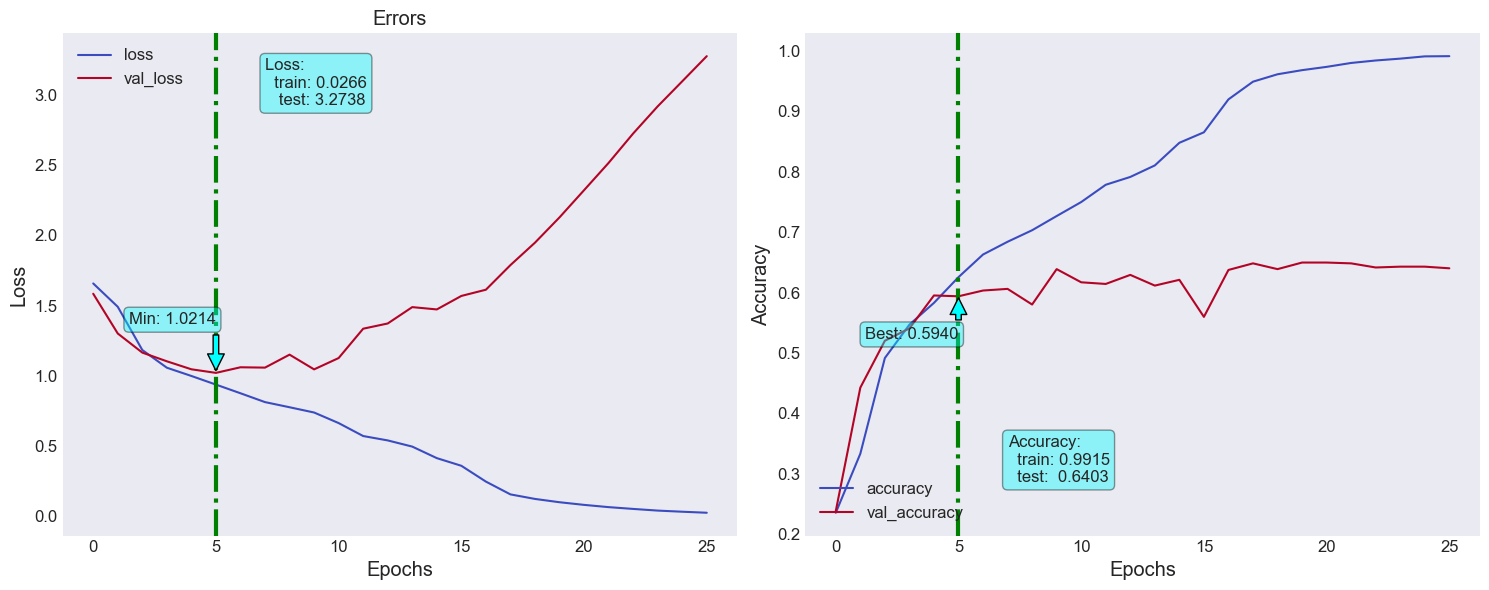

In [27]:
fn_plot_tf_hist(loss_df)

|params|img|
|----|----|
|base|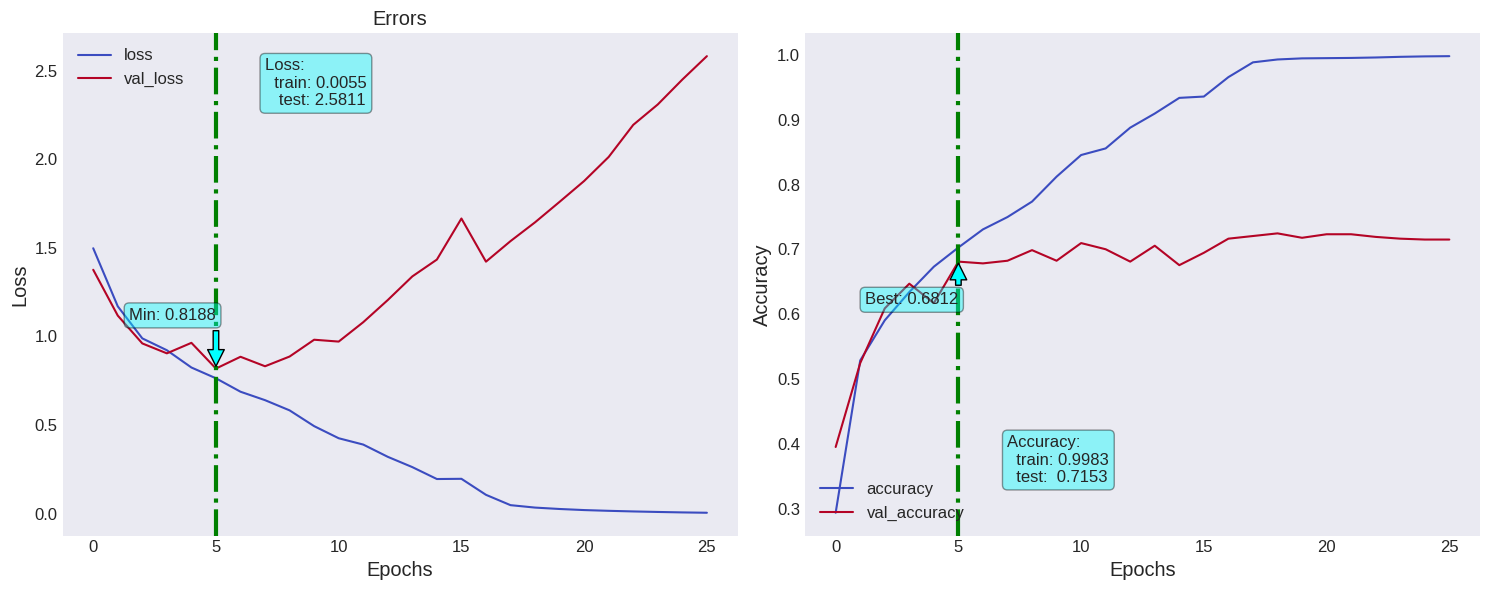|
|||
|||
|||

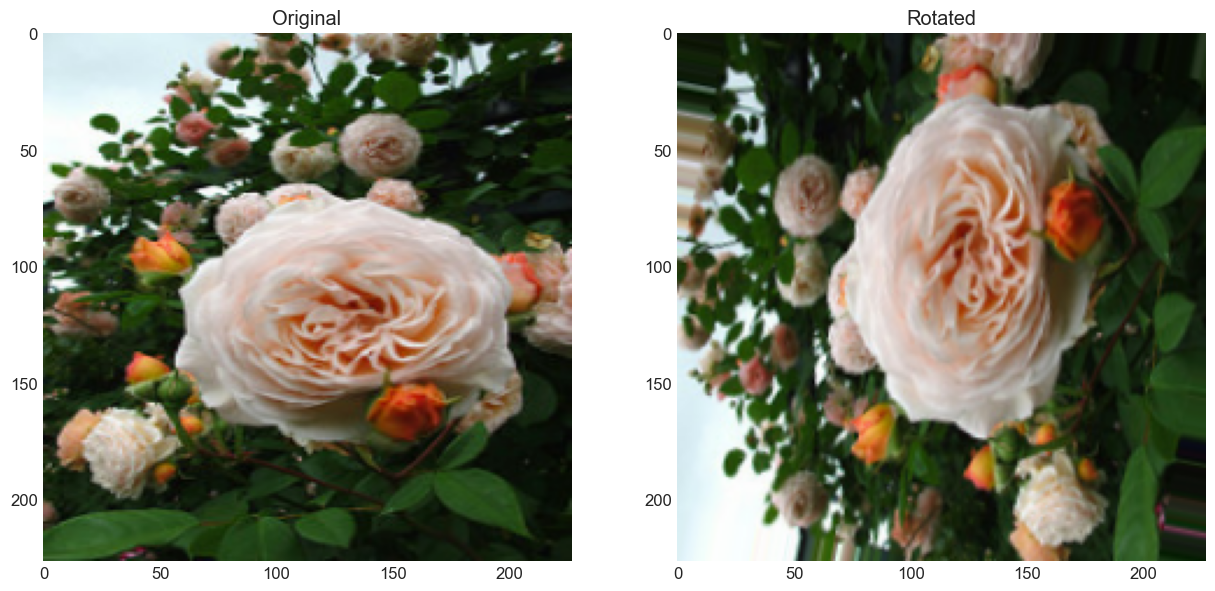

In [28]:
layer = tf.keras.layers.RandomRotation((-0.5, 0.5), fill_mode = 'nearest', seed = RANDOM_STATE)
plt.figure()

img_num = 0

for images, labels in train_ds.take(1):

  out_images = layer(images)

  plt.subplot(1,2,1)
  plt.title('Original')
  plt.imshow(images[img_num].numpy().astype('uint16'))
  plt.grid(False)

  plt.subplot(1,2,2)
  plt.title('Rotated')
  plt.imshow(out_images[img_num].numpy().astype('uint16'))
  plt.grid(False)